<a href="https://colab.research.google.com/github/2SUBDA/Block2_Walk/blob/Week_4/Week4_Asynch_TimeSeries_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample code for time series analysis using ARIMA
Based on Miller, 2015

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


In [2]:
# OBTAIN - THERE ARE MANY WAYS TO READ INFO INTO COLAB
# THIS IS ONE - ASSUMES YOU HAVE A DATA FILE AVAILABLE ONLINE YOU WANT TO ACCESS

sales = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/Block2_Walk/Week_4/champagne.csv', 
                    index_col="Datetime", parse_dates=["Datetime"])
print(sales.describe())

       ChampagneSales
count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000


In [12]:
sales

,ChampagneSales,Year
Datetime,,
1964-01-01,2815,1964
1964-02-01,2672,1964
1964-03-01,2755,1964
1964-04-01,2721,1964
1964-05-01,2946,1964
...,...,...
1972-05-01,4618,1972
1972-06-01,5312,1972
1972-07-01,4298,1972


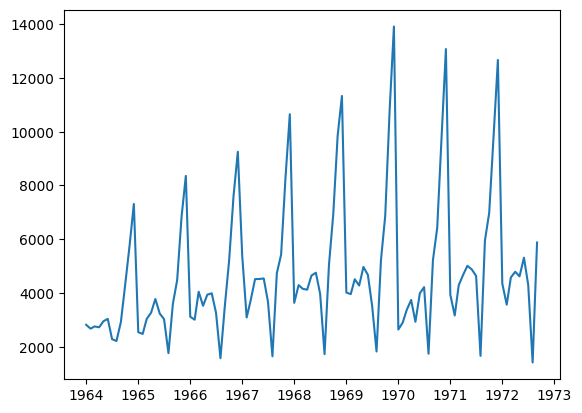

In [14]:
plt.plot(sales['ChampagneSales'])
plt.show()

/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


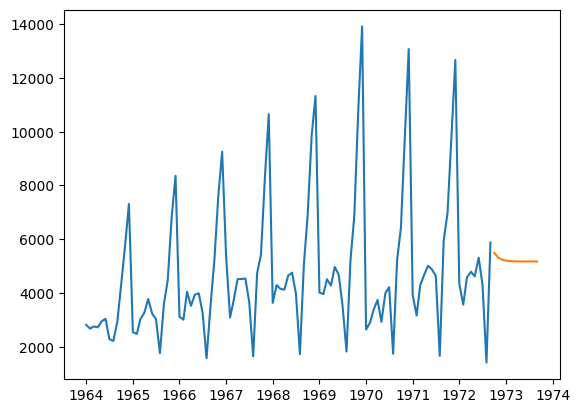

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales['ChampagneSales'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

plt.plot(sales['ChampagneSales'])
plt.plot(forecast)
plt.show()

In [3]:
# SCRUB - DID WE GET OUR INDEX IN AS A DATE

sales.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Datetime', length=105, freq=None)

In [4]:
# EXPLORE - WHAT DOES OUR DATA LOOK LIKE
sales = sales.sort_index()
sales.head()

,ChampagneSales
Datetime,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
# EXPLORE - HOW CAN WE LOOK AT A CERTAIN TIME PERIOD?

sales.loc['1970']


,ChampagneSales
Datetime,
1970-01-01,2639
1970-02-01,2899
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927
1970-06-01,3986
1970-07-01,4217
1970-08-01,1738
1970-09-01,5221


Text(0.5, 1.0, 'Champagne Sales from 1964 to 1972ish')

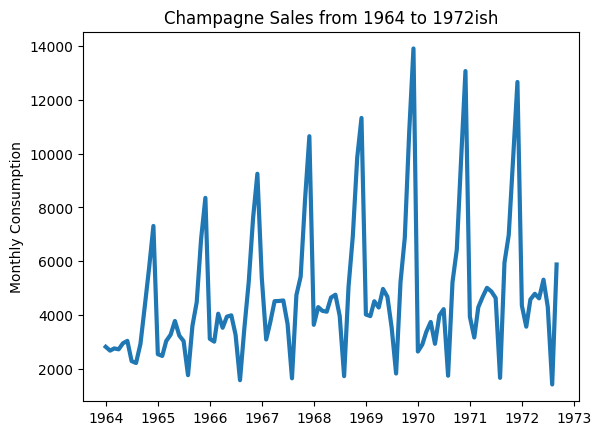

In [6]:
# EXPLORE - HOW CAN WE SEE A VISUAL OF THE DATA?

fig, ax = plt.subplots()
ax.plot(sales['ChampagneSales'], linewidth=3)
ax.set_ylabel('Monthly Consumption')
ax.set_title('Champagne Sales from 1964 to 1972ish')


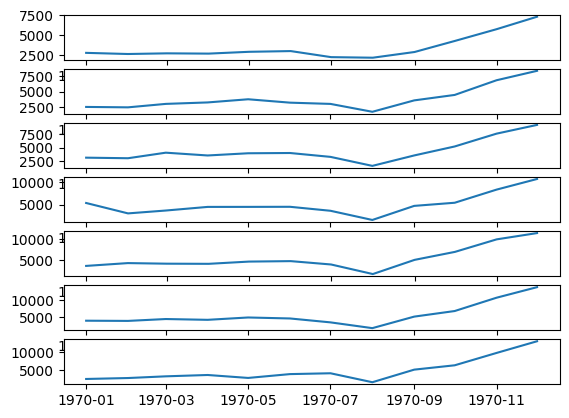

Empty DataFrame
Columns: []
Index: []


In [7]:
# EXPLORE - HOW CAN WE LOOK AT SALES ACROSS A SEVEN YEAR PERIOD

groups = sales['1964':'1970'].groupby(pd.Grouper(freq=('A')))
years = pd.DataFrame()
plt.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	plt.subplot((n_groups*100) + 10 + i)
	i += 1
	plt.plot(group)
plt.show()
print(years)
print(groups)

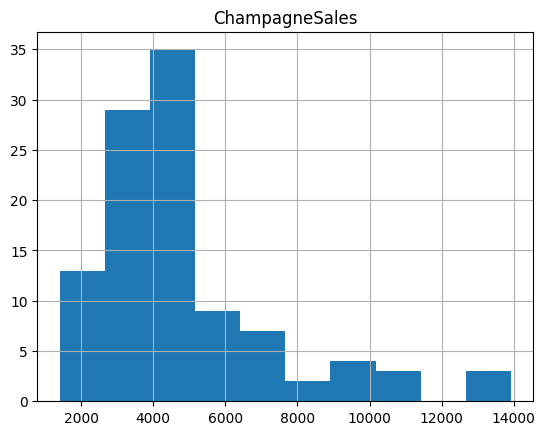

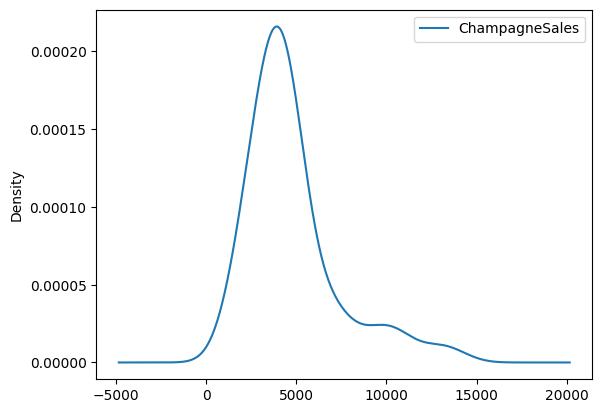

In [8]:
# EXPLORE - HOW CAN WE LOOK AT DISTRIBUTION OF SALES

sales.hist()

sales.plot(kind='kde')
plt.show()

<Axes: xlabel='Year', ylabel='ChampagneSales'>

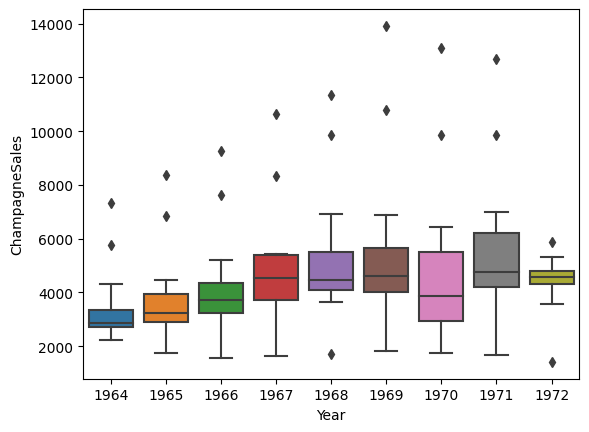

In [9]:
# SCRUB & EXPLORE - ADD YEAR COLUMN FOR SIMPLE GROUP BY WITH SEABORN

sales['Year'] = sales.index.year
#sales.sample(10,random_state=0)

sns.boxplot(data=sales, x='Year', y='ChampagneSales')

In [10]:
# EXPLORE - WHAT DOES THE ADF TEST TELL US?
# IS OUR TIME SERIES STATIONARY OR NOT?

result = adfuller(sales['ChampagneSales'], autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


The Augmented Dickey Fuller (ADF) test helps us determine if the time series is stationary or non-stationary.  If the p-value is greater than 0.05, we accept the null hypothesis that the time-series is **non-stationary** (increasing mean & variance).

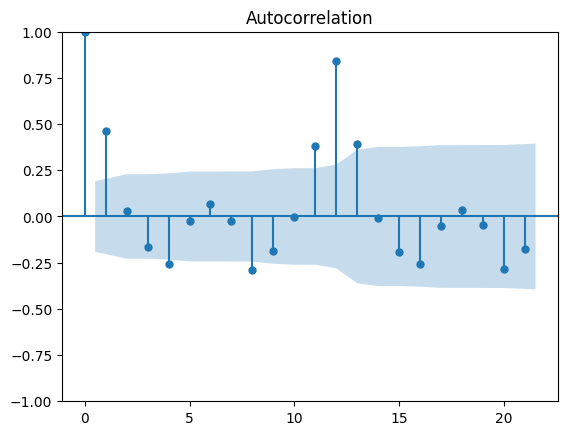

/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


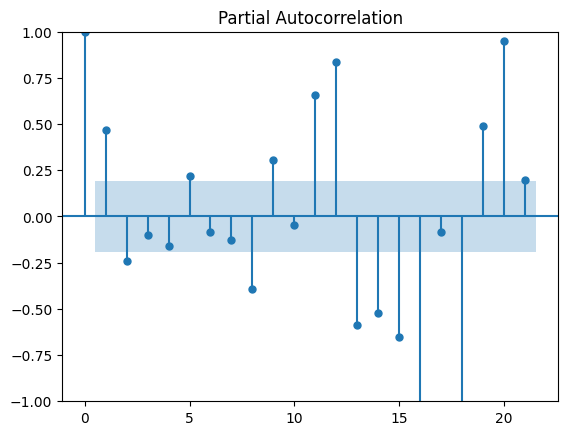

In [11]:
# EXPLORE - WHAT DO THE CORRELATION PLOTS TELL US ABOUT THE DATA?

plot_acf(sales['ChampagneSales'], ax=plt.gca())
plt.show()

#pyplot.subplot(212)

plot_pacf(sales['ChampagneSales'], ax=plt.gca())
plt.show()

The Autocorrelation Plots help us determine the correlation between lags Dickey Fuller (ADF) test helps us determine if the time series is stationary or non-stationary.  

The null hypothesis is the series is non-stationary.

If the p-value is greater than 0.05, we accept the null hypothesis that the time-series is **non-stationary** (increasing mean & variance).

import statsmodels.tsa.arima.model

# Import the AirPassengers dataset
from statsmodels.datasets import load_airpassengers

# Create an instance of the ARIMA class
arima = statsmodels.tsa.arima.model.ARIMA(load_airpassengers(), order=(1, 1, 1))

# Fit the model to the data
arima.fit()

# Predict future values
predictions = arima.predict(start=2000, end=2010)


In [22]:
import pandas as pd
import statsmodels.tsa.statespace.sarimax as sarimax

# Create a DataFrame
df = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Passengers': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
})

# Reshape the endog argument
endog = df['Passengers'].values.reshape(-1)

# Create an instance of the SARIMAX class
model = sarimax.SARIMAX(endog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the data
model.fit()

# Predict future values
predictions = model.predict(start=2000, end=2010)

# Print the predictions
print(predictions)


/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


TypeError: predict() missing 1 required positional argument: 'params'

In [23]:
import pandas as pd
import statsmodels.tsa.statespace.sarimax as sarimax

# Create a DataFrame
df = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Passengers': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
})

# Reshape the endog argument
endog = df['Passengers'].values.reshape(-1)

# Create an instance of the SARIMAX class
model = sarimax.SARIMAX(endog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the data
model.fit()

# Predict future values
predictions = model.predict(start=2000, end=2010, params=(1, 1, 1, 12))

# Print the predictions
print(predictions)


/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


NotImplementedError: 

In [24]:
import pandas as pd
import statsmodels.tsa.statespace.sarimax as sarimax

# Create a DataFrame
df = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Passengers': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
})

# Reshape the endog argument
endog = df['Passengers'].values.reshape(-1)

# Create an instance of the SARIMAX class
model = sarimax.SARIMAX(endog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the data
model.fit()

# Predict future values
predictions = model.forecast(steps=10)

# Print the predictions
print(predictions)


/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/pergolicious/Library/CloudStorage/OneDrive-SyracuseUniversity/Syracuse University/Courses/IST 718/ist718venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


AttributeError: 'SARIMAX' object has no attribute 'forecast'